In [1]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "small_cell_nodes"
project_name = settings["RUN"]["project_name"]

INFO:root:torch is not installed


In [2]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile, index_col=None)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    #df["Use Case"]=df["Use Case"].astype('category').cat.codes

    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()

Run project explor for data small_cell_nodes
Num cols: 22. Num rows: 2391. Num classes: 1
Name cols: Index(['OWNERNAME', 'APPLICANTCOMPANYNAME', 'PERMITMASTERNUMBER',
       'PERMITREFNUMBER', 'NODEGROUP', 'NODEID', 'NODEADDRESS', 'NODE_N',
       'NODE_E', 'NODETYPE', 'STATUS', 'POLEMATERIAL', 'POLEMANUFACTURER',
       'POLEMODEL', 'POLEHEIGHT_FT', 'POLECOLOR', 'RFEQUIPMENT', 'INTENDEDUSE',
       'ASSETOWNER', 'SITEID', 'FIXEDASSETID', 'COUNCIL_DISTRICT'],
      dtype='object')
Target col: slice Type


,OWNERNAME,APPLICANTCOMPANYNAME,PERMITMASTERNUMBER,PERMITREFNUMBER,NODEGROUP,NODEID,NODEADDRESS,NODE_N,NODE_E,NODETYPE,...,POLEMANUFACTURER,POLEMODEL,POLEHEIGHT_FT,POLECOLOR,RFEQUIPMENT,INTENDEDUSE,ASSETOWNER,SITEID,FIXEDASSETID,COUNCIL_DISTRICT
0,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A,DN90XS379E,1692 Glenarm PL,39.744554,-104.989407,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
1,Mobilitie,Mobilitie,NaN,NaN,2018 Group 3\r\n,DN90XS381B\r\n,1652 N. Lincoln St.\r\n,39.742565,-104.985513,"Type 1A, Utility Pole Mounted",...,Other,TBD by Xcel\r\n,34.0,,Alpha AW3477-S (Omni B41),Single Carrier,,NaN,NaN,10
2,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSG53C\r\n,1688 Welton St.\r\n,39.745220,-104.990277,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
3,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSH39C\r\n,1231 Glenarm PL.\r\n,39.740519,-104.994896,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
4,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1B\r\n,DN90XSH55D\r\n,1461 N. Delaware St.\r\n,39.739439,-104.993035,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,10


In [3]:
df = (
    df.loc[:,['OWNERNAME','NODE_N','NODE_E','APPLICANTCOMPANYNAME', 'NODETYPE', 'STATUS']]
    .dropna()
)

df.head()

,OWNERNAME,NODE_N,NODE_E,APPLICANTCOMPANYNAME,NODETYPE,STATUS
0,Mobilitie,39.744554,-104.989407,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
1,Mobilitie,39.742565,-104.985513,Mobilitie,"Type 1A, Utility Pole Mounted",Existing
2,Mobilitie,39.745220,-104.990277,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
3,Mobilitie,39.740519,-104.994896,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
4,Mobilitie,39.739439,-104.993035,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing


In [4]:
from utils import split_train_test, exploratory_analysis, encode_labels

labels = df['STATUS']
df2 = df.copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2['OWNERNAME'] = label_encoder.fit_transform(df2['OWNERNAME'])
df2['APPLICANTCOMPANYNAME'] = label_encoder.fit_transform(df2['APPLICANTCOMPANYNAME'])
df2['NODETYPE'] = label_encoder.fit_transform(df2['NODETYPE'])
df2['STATUS'] = label_encoder.fit_transform(df2['STATUS'])

X_train, X_test, y_train, y_test = split_train_test(df2, labels, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
#exploratory_analysis(X_train, y_train_onehot)

In [5]:
np.unique(df['APPLICANTCOMPANYNAME'])

array(['BV', 'Crown Castle', 'Mobilitie', 'Smartlink', 'Verizon Wireless',
       'Zayo Group, LLC'], dtype=object)

In [6]:
np.unique(df['OWNERNAME'])

array(['ATT', 'Crown Castle', 'Mobilitie', 'VERIZON', 'Zayo Group, LLC'],
      dtype=object)

In [7]:
np.unique(df['NODETYPE'])

array(['Type 1A, Utility Pole Mounted',
       'Type 1B, Utility Pole Strand Mounted',
       'Type 2, Wood Street Light Mounted',
       'Type 3A, Combo Pole w/Cantenna',
       'Type 3B, Combo Pole w/External Shroud',
       'Type 3C, Combo Pole w/Cantenna, External Shroud',
       'Type 4, Single-Carrier Freestanding Pole',
       'Type 6A, Multi-Tenant Freestanding Pole A'], dtype=object)

In [8]:
np.unique(df['STATUS'])

array(['Existing', 'Future Planned 1-2 Year', 'Future Planned 1-2 year',
       'Installed', 'Proposed'], dtype=object)

In [9]:
ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y != "Proposed")]
df_existing = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_existing.columns)
num_rows = len(df_existing)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")


Num cols: 6. Num rows: 909.


In [10]:
import folium as fl

m = fl.Map(location=[39.742793, -105.0109598],zoom_start=11)

for lat,long,owner in zip(df_existing.NODE_N,df_existing.NODE_E,df.OWNERNAME):
    fl.Marker([lat,long],popup=owner).add_to(m)

m

In [11]:

from folium.plugins import HeatMap

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_existing.NODE_N,df_existing.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

In [12]:
# Proposed 

ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y == "Proposed")]
df_proposed = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_proposed.columns)
num_rows = len(df_proposed)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_proposed.NODE_N,df_proposed.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

Num cols: 6. Num rows: 1482.


In [13]:
def get_label(val):
    if val == "Proposed": 
        return 1
    elif val == "Future Planned 1-2 Year": 
        return 0
    elif val == "Future Planned 1-2 year": 
        return 0
    else: 
        return 2 
    
df["proposed"] = [ get_label(x) for x in df["STATUS"]]
df = df[df["proposed"] < 2]

In [14]:
df.head()

,OWNERNAME,NODE_N,NODE_E,APPLICANTCOMPANYNAME,NODETYPE,STATUS,proposed
8,ATT,39.715104,-104.940872,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
9,ATT,39.720317,-104.940894,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
10,ATT,39.730652,-104.940534,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
11,ATT,39.663083,-104.940541,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
12,ATT,39.653204,-104.924379,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0


In [15]:
print(df['NODE_N'].describe())
df = df[df['OWNERNAME'] != 'Crown Castle']
print(df['NODE_N'].describe())

count    1.916000e+03
mean     2.784805e+05
std      6.279086e+05
min      3.962414e+01
25%      3.971538e+01
50%      3.974763e+01
75%      3.977713e+01
max      1.716303e+06
Name: NODE_N, dtype: float64
count    1601.000000
mean       39.733095
std         0.036524
min        39.624139
25%        39.710448
50%        39.738776
75%        39.759277
max        39.825545
Name: NODE_N, dtype: float64


In [16]:
print(df['NODE_E'].describe())
#df = df[df['OWNERNAME'] != 'Crown Castle']
#print(df['NODE_N'].describe())

count    1601.000000
mean     -104.960529
std         0.061447
min      -105.090463
25%      -105.008142
50%      -104.962780
75%      -104.922283
max      -104.737108
Name: NODE_E, dtype: float64


In [17]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [18]:
NEAREST = 5 

import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def calculate_distances(nodes_n, nodes_e):
    dim = len(nodes_n)
    assert dim > 0
    dist = np.zeros((dim,dim))

    for i in range(dim):
        for j in range(i+1):
            dist[i][j] = euclidean_distance([nodes_n[i], nodes_e[i]], [nodes_n[j], nodes_e[j]]) 
            dist[j][i] = euclidean_distance([nodes_n[i], nodes_e[i]], [nodes_n[j], nodes_e[j]]) 

    return dist

def find_nearest(index, dist_, df_):
    distances = dist[index][:]
    sort_index = np.argsort(distances)[1:NEAREST+1] #ignore itself
    nearest = df.iloc[sort_index]
    vals = [[x,y] for (x,y) in zip(nearest["NODE_N"], nearest["NODE_E"])]
    vals = [item for row in vals for item in row]
    ids = list(nearest.index.values)
    return (vals, ids)

datafile = pathjoin(datasets_dir, project_name, dataset_name, 'distances.npy')
#dist = calculate_distances(df["NODE_N"].values, df["NODE_E"].values)
#np.save(datafile, dist) # save

dist = np.load(datafile) # load

nearest_pairs = [find_nearest(x,dist,df) for x in range(len(df))]
connections  = [ {"target": y[1][i], "source":x} for (x,y)  in zip(range(len(df)), nearest_pairs) for i in range(NEAREST)]
connections = pd.DataFrame(connections)
connections.head()

,target,source
0,668,0
1,1244,0
2,959,0
3,105,0
4,1284,0


In [19]:
features = pd.DataFrame([{'feat_' + str(i): y[0][i] for i in range(NEAREST*2)} for (x,y)  in zip(range(len(df)), nearest_pairs) ])
features["node_n"] = df["NODE_N"].values
features["node_e"] = df["NODE_E"].values
features["name"] = df.index.values
features["proposed"] = df["proposed"].values

print(f"Length {len(features)}")
features.head()

Length 1601


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,node_n,node_e,name,proposed
0,39.715856,-104.940564,39.713202,-104.940555,39.718753,-104.940880,39.711630,-104.943136,39.711412,-104.942781,39.715104,-104.940872,0,0
1,39.721318,-104.940876,39.718753,-104.940880,39.719346,-104.943216,39.724087,-104.940871,39.721604,-104.945021,39.720317,-104.940894,1,0
2,39.731099,-104.940098,39.731216,-104.942966,39.728604,-104.938246,39.732855,-104.943938,39.727373,-104.944077,39.730652,-104.940534,2,0
3,39.659151,-104.940419,39.663825,-104.945308,39.668474,-104.942957,39.661333,-104.931774,39.671137,-104.945472,39.663083,-104.940541,3,0
4,39.652941,-104.929025,39.659049,-104.923464,39.653195,-104.930661,39.646888,-104.922379,39.646358,-104.922387,39.653204,-104.924379,4,0


In [20]:
nan_indexes = features[features.isna().any(axis=1)]
nan_indexes

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,node_n,node_e,name,proposed


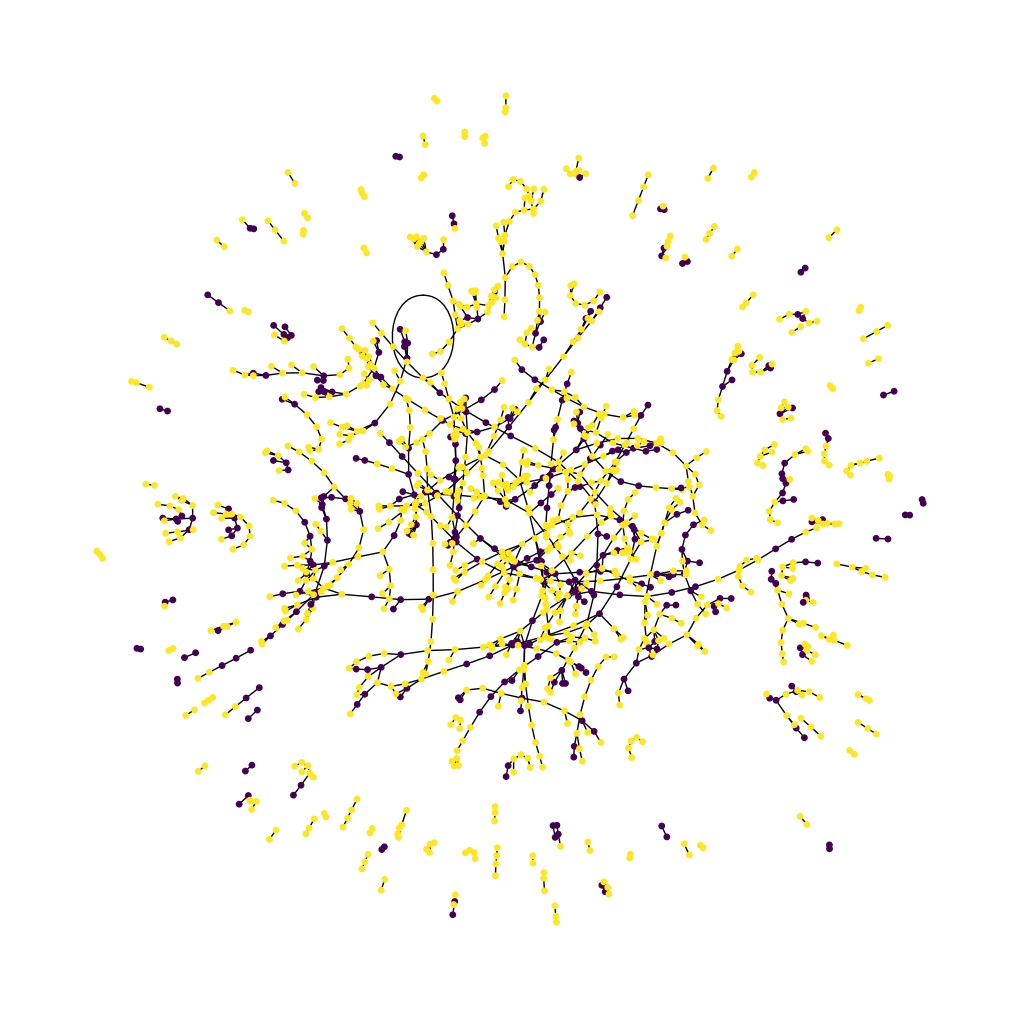

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

def is_valid_name(x, vals):
    return x in vals

plt.figure(figsize=(10, 10))
colors = features["proposed"].tolist()
samples = connections.sample(n=1500)
ids = [is_valid_name(x, list(features["name"])) for x in samples["source"]]
samples = samples.iloc[ids]
ids = [is_valid_name(x, list(features["name"])) for x in samples["target"]]
samples = samples.iloc[ids]
cora_graph = nx.from_pandas_edgelist(samples)
labels = list(features[features["name"].isin(list(cora_graph.nodes))]["proposed"])
nx.draw_spring(cora_graph, node_size=15, node_color=labels)

In [22]:
from sklearn.model_selection import train_test_split

train_data, test_data, y_train, y_test = train_test_split(features, features.proposed,  test_size=0.2, stratify=features.proposed, 
                                                          shuffle=True, random_state=42)
print("Total data shape:", len(labels))
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Total data shape: 1387
Train data shape: (1280, 14)
Test data shape: (321, 14)


In [23]:
nan_indexes = features[features.isna().any(axis=1)]
nan_indexes

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,node_n,node_e,name,proposed


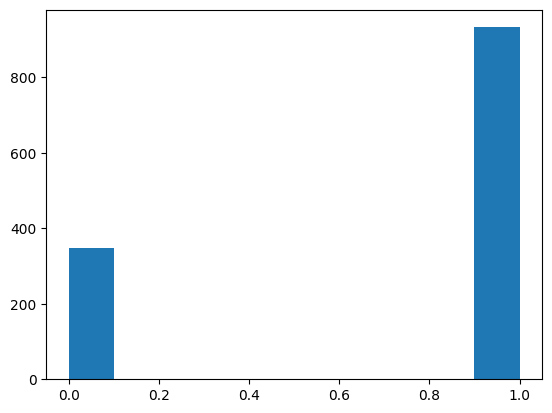

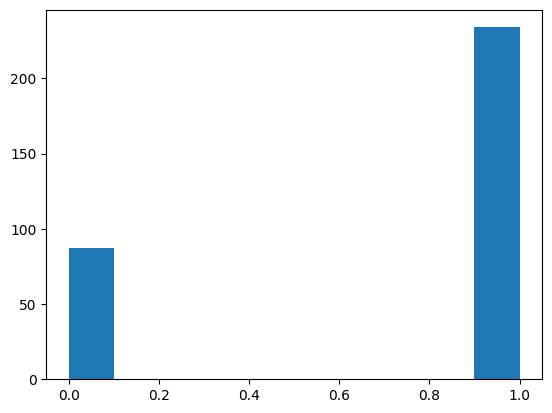

In [24]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.show() 

plt.hist(y_test)
plt.show() 

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 12)]                 0         []                            
 )                                                                                                
                                                                                                  
 ffn_block1 (Sequential)     (None, 16)                   592       ['input_features[0][0]']      
                                                                                                  
 ffn_block2 (Sequential)     (None, 16)                   672       ['ffn_block1[0][0]']          
                                                                                                  
 skip_connection2 (Add)      (None, 16)                   0         ['ffn_block1[0][0]',   

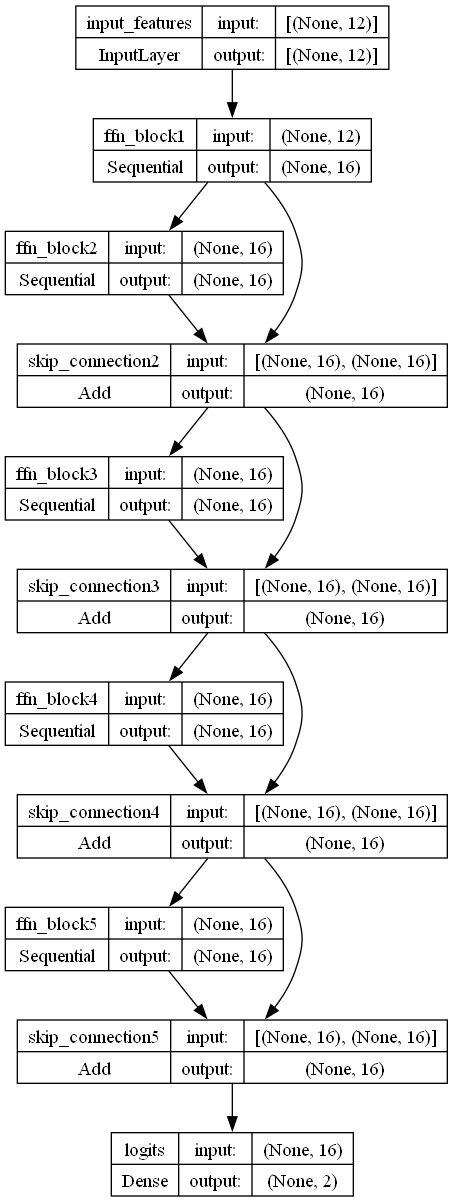

In [25]:
from utils.gnn import create_baseline_model, run_experiment, display_learning_curves, hidden_units, dropout_rate
import tensorflow.keras as keras
import tensorflow as tf

feature_names = set(features.columns) - {"name", "proposed"}
num_features = len(feature_names)
num_classes = 2

# Create train and test features as a numpy array.
x_train = train_data[list(feature_names)].to_numpy()
x_test = test_data[list(feature_names)].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["proposed"]
y_test = test_data["proposed"]

# Baseline 
baseline_model = create_baseline_model(hidden_units, num_features, num_classes, dropout_rate)
baseline_model.summary()

from tensorflow.keras.utils import plot_model

plot_model(baseline_model,
           to_file='baseline.png',
           show_shapes=True,
           show_layer_names=True)


Epoch 1/100


3/3 [==============================] - 2s 169ms/step - loss: 3.1843 - acc: 0.2875 - val_loss: 62.8315 - val_acc: 0.2656
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 1.3992 - acc: 0.4437 - val_loss: 14.3160 - val_acc: 0.7344
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.9211 - acc: 0.6844 - val_loss: 38.1443 - val_acc: 0.7344
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.9548 - acc: 0.7297 - val_loss: 47.5090 - val_acc: 0.7344
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 1.0873 - acc: 0.7219 - val_loss: 39.5495 - val_acc: 0.7344
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.9558 - acc: 0.7234 - val_loss: 19.2661 - val_acc: 0.7344
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8415 - acc: 0.7125 - val_loss: 1.7714 - val_acc: 0.7344
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7309 - acc: 0.7047 - 

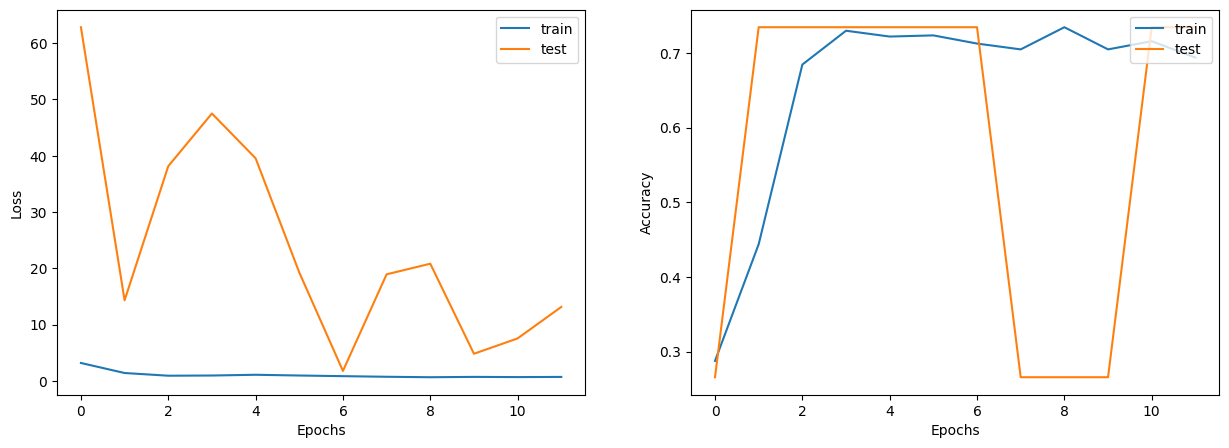

Test accuracy: 72.9%
1/1 [==============================] - 0s 230ms/step
Instance 1:
- existing: 20.53%
- proposed: 79.47%
Instance 2:
- existing: 20.53%
- proposed: 79.47%


In [26]:
history = run_experiment(baseline_model, x_train, y_train)

display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

class_idx = [0, 1]
class_values = ['existing', 'proposed']

def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")
            
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Edges shape: (2, 8005)
Nodes shape: (1601, 12)
GNN output shape: tf.Tensor(
[[28.142511 16.518246]
 [28.142954 16.517769]
 [28.152819 16.517994]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (1601, 16)                592       
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  1664      
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  1664      
 r)                                                              
                                                                 
 postprocess (Sequential)    (1601, 16)                672       
                                                                 
 logits (Dens

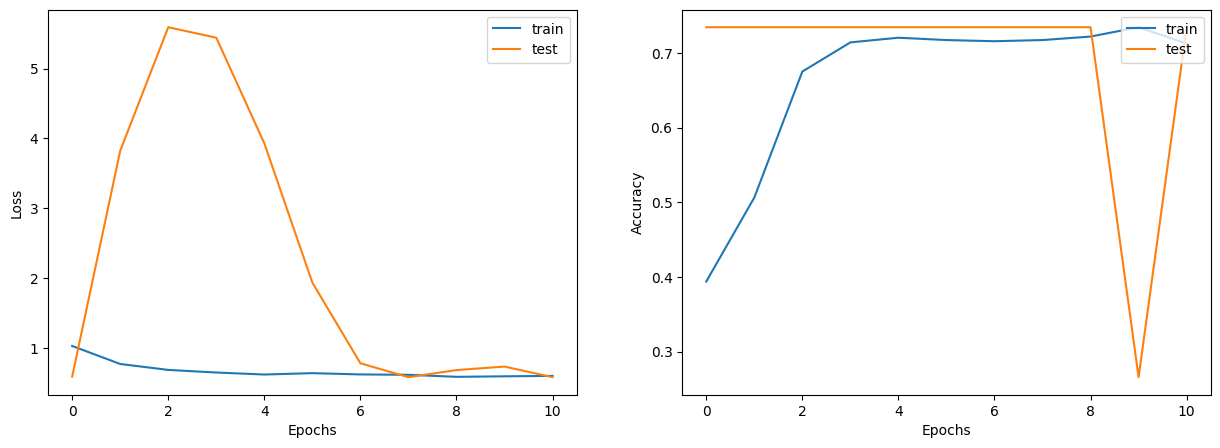

Test accuracy: 72.9%


In [27]:
# GNN
#https://keras.io/examples/graph/gnn_citations/

from utils.gnn import GNNNodeClassifier, optimizer, run_experiment
# optimizer = keras.optimizers.RMSprop(learning_rate=3e-1, momentum=momentum)


# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = connections[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    features.sort_values("name")[list(feature_names)].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)


gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, num_classes, 100]))
gnn_model.summary()

#plot_model(gnn_model, to_file='gnn.png', show_shapes=True, show_layer_names=True)

x_train = train_data.name.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)


display_learning_curves(history)
x_test = test_data.name.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Edges shape:		 (8005, 2)
Node features shape: (1601, 12)
Epoch 1/100
3/3 [==============================] - 8s 878ms/step - loss: 65226.3555 - acc: 0.5703 - val_loss: 13133.7637 - val_acc: 0.7344
Epoch 2/100
3/3 [==============================] - 0s 155ms/step - loss: 17241.1660 - acc: 0.6328 - val_loss: 5668.8564 - val_acc: 0.7375
Epoch 3/100
3/3 [==============================] - 0s 156ms/step - loss: 8132.6860 - acc: 0.7250 - val_loss: 5015.2935 - val_acc: 0.7359
Epoch 4/100
3/3 [==============================] - 0s 158ms/step - loss: 4006.4243 - acc: 0.5766 - val_loss: 3377.9192 - val_acc: 0.7344
Epoch 5/100
3/3 [==============================] - 0s 155ms/step - loss: 2852.9731 - acc: 0.6547 - val_loss: 2222.4712 - val_acc: 0.7344
Epoch 6/100
3/3 [==============================] - 0s 160ms/step - loss: 3335.9907 - acc: 0.7188 - val_loss: 1416.3514 - val_acc: 0.7312
Epoch 7/100
3/3 [==============================] - 0s 158ms/step - loss: 4668.9946 - acc: 0.5188 - val_loss: 3277.1921

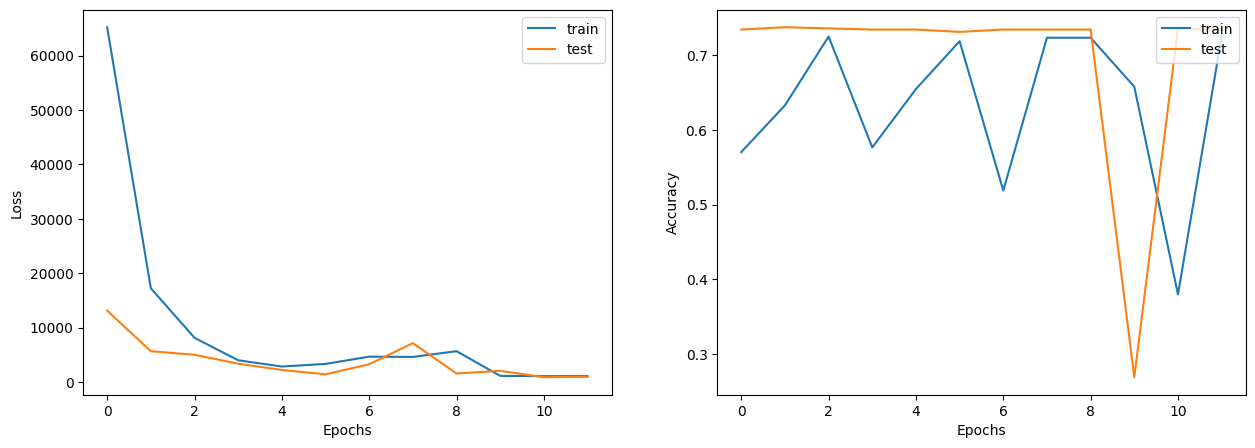

Test accuracy: 71.65%


In [29]:
import importlib
from utils import gnn 
importlib.reload(gnn)

from utils.gnn import optimizer, run_experiment

# GAT  
#https://keras.io/examples/graph/gat_node_classification/
from utils.gnn import GraphAttentionNetwork, optimizer
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)


# Define graph, namely an edge tensor and a node feature tensor
edges = tf.convert_to_tensor(connections[["target", "source"]])
node_states = tf.convert_to_tensor(features.sort_values("name").iloc[:, 1:-1])

# Print shapes of the graph
print("Edges shape:\t\t", edges.shape)
print("Node features shape:", node_states.shape)

# Obtain paper indices which will be used to gather node states
# from the graph later on when training the model
train_indices = train_data["name"].to_numpy()
test_indices = test_data["name"].to_numpy()

# Obtain ground truth labels corresponding to each paper_id
train_labels = y_train.to_numpy()
test_labels = y_test.to_numpy()



# Define hyper-parameters
HIDDEN_UNITS = 100
NUM_HEADS = 8
NUM_LAYERS = 3
OUTPUT_DIM = len(class_values)


# Build model
gat_model = GraphAttentionNetwork(
    node_states, edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM, optimizer,
)


#x_train = train_data.name.to_numpy()
history = run_experiment(gat_model, train_indices, train_labels)

display_learning_curves(history)
#x_test = test_data.name.to_numpy()
_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")


In [30]:
#import visualkeras
#visualkeras.layered_view(gat_model, to_file='gat.png').show() # write and show

gat_model.summary()


Model: "graph_attention_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            multiple                  10400     
                                                                 
 multi_head_graph_attention  multiple                  641600    
  (MultiHeadGraphAttention)                                      
                                                                 
 multi_head_graph_attention  multiple                  641600    
 _1 (MultiHeadGraphAttentio                                      
 n)                                                              
                                                                 
 multi_head_graph_attention  multiple                  641600    
 _2 (MultiHeadGraphAttentio                                      
 n)                                                              
                                           